In [31]:
"""This script find EVE covered variant scores"""
import pandas as pd
import numpy as np
import warnings
pd.options.mode.chained_assignment = None

import os, sys

In [124]:
df_clinvar_eve_overlaps = pd.read_csv('./data/metas/clinvar_eve_overlapped_genes.csv')
df_clinvar_eve_overlaps.drop(['GeneID','OtherIDs','NM_ID'], axis=1, inplace=True)
df_clinvar_eve_overlaps

,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes
0,NM_000016.6(ACADM):c.1010A>C (p.Tyr337Ser),ACADM,Likely pathogenic,1010,A/C,Tyr337Ser,Tyr,337,Ser,A0A0S2Z366,ACADM_HUMAN,2,Pathogenic
1,NM_000016.6(ACADM):c.1034A>T (p.Asp345Val),ACADM,Pathogenic,1034,A/T,Asp345Val,Asp,345,Val,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic
2,NM_000016.6(ACADM):c.1042C>T (p.Arg348Cys),ACADM,Pathogenic,1042,C/T,Arg348Cys,Arg,348,Cys,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic
3,NM_000016.6(ACADM):c.1045C>G (p.Arg349Gly),ACADM,Pathogenic,1045,C/G,Arg349Gly,Arg,349,Gly,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic
4,NM_000016.6(ACADM):c.1046G>A (p.Arg349Gln),ACADM,Pathogenic,1046,G/A,Arg349Gln,Arg,349,Gln,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56509,NM_213720.3(CHCHD10):c.268A>C (p.Thr90Pro),CHCHD10,Benign/Likely benign,268,A/C,Thr90Pro,Thr,90,Pro,Q8WYQ3,CHC10_HUMAN,2,Benign
56510,NM_213720.3(CHCHD10):c.274G>C (p.Ala92Pro),CHCHD10,Benign/Likely benign,274,G/C,Ala92Pro,Ala,92,Pro,Q8WYQ3,CHC10_HUMAN,2,Benign
56511,NM_213720.3(CHCHD10):c.284A>C (p.Gln95Pro),CHCHD10,Likely benign,284,A/C,Gln95Pro,Gln,95,Pro,Q8WYQ3,CHC10_HUMAN,1,Benign
56512,NM_213720.3(CHCHD10):c.286C>A (p.Pro96Thr),CHCHD10,Benign,286,C/A,Pro96Thr,Pro,96,Thr,Q8WYQ3,CHC10_HUMAN,2,Benign


In [125]:
# convert 3 letter codes to 1 letter
amino_acids_dict = {'Ala': 'A', 'Arg': 'R', 'Asn': 'N', 'Asp': 'D', 'Cys': 'C', 'Glu': 'E', 'Gln': 'Q', 'Gly': 'G', 'His': 'H', 'Ile': 'I', 'Leu': 'L', 'Lys': 'K', 'Met': 'M', 'Phe': 'F', 'Pro': 'P', 'Ser': 'S', 'Thr': 'T', 'Trp': 'W', 'Tyr': 'Y', 'Val': 'V'}
df_clinvar_eve_overlaps['Amino_acids_before'] = df_clinvar_eve_overlaps['Amino_acids_before_3letters'].map(amino_acids_dict)
df_clinvar_eve_overlaps['Amino_acids_after'] = df_clinvar_eve_overlaps['Amino_acids_after_3letters'].map(amino_acids_dict)
#df_subset.drop(['Amino_acids_after_3letters', 'Amino_acids_before_3letters', 'Amino_acids_before', 'Amino_acids_after'], axis=1, inplace=True)
df_clinvar_eve_overlaps.dropna(inplace=True)
df_clinvar_eve_overlaps

,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after
0,NM_000016.6(ACADM):c.1010A>C (p.Tyr337Ser),ACADM,Likely pathogenic,1010,A/C,Tyr337Ser,Tyr,337,Ser,A0A0S2Z366,ACADM_HUMAN,2,Pathogenic,Y,S
1,NM_000016.6(ACADM):c.1034A>T (p.Asp345Val),ACADM,Pathogenic,1034,A/T,Asp345Val,Asp,345,Val,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,D,V
2,NM_000016.6(ACADM):c.1042C>T (p.Arg348Cys),ACADM,Pathogenic,1042,C/T,Arg348Cys,Arg,348,Cys,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,R,C
3,NM_000016.6(ACADM):c.1045C>G (p.Arg349Gly),ACADM,Pathogenic,1045,C/G,Arg349Gly,Arg,349,Gly,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,R,G
4,NM_000016.6(ACADM):c.1046G>A (p.Arg349Gln),ACADM,Pathogenic,1046,G/A,Arg349Gln,Arg,349,Gln,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,R,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56509,NM_213720.3(CHCHD10):c.268A>C (p.Thr90Pro),CHCHD10,Benign/Likely benign,268,A/C,Thr90Pro,Thr,90,Pro,Q8WYQ3,CHC10_HUMAN,2,Benign,T,P
56510,NM_213720.3(CHCHD10):c.274G>C (p.Ala92Pro),CHCHD10,Benign/Likely benign,274,G/C,Ala92Pro,Ala,92,Pro,Q8WYQ3,CHC10_HUMAN,2,Benign,A,P
56511,NM_213720.3(CHCHD10):c.284A>C (p.Gln95Pro),CHCHD10,Likely benign,284,A/C,Gln95Pro,Gln,95,Pro,Q8WYQ3,CHC10_HUMAN,1,Benign,Q,P
56512,NM_213720.3(CHCHD10):c.286C>A (p.Pro96Thr),CHCHD10,Benign,286,C/A,Pro96Thr,Pro,96,Thr,Q8WYQ3,CHC10_HUMAN,2,Benign,P,T


In [126]:
df_clinvar_eve_overlaps = df_clinvar_eve_overlaps.sort_values(by='UniProtKB-ID').reset_index()

In [127]:
file_name_to_check = 'ACADM_HUMAN'
file = pd.read_csv('./data/eve_download/variant_files/%s.csv' % file_name_to_check)
file_reindex = file.set_index(['wt_aa', 'position', 'mt_aa'])
file_reindex

ClinVar_ClinicalSignificance  Gold_Stars  \
wt_aa position mt_aa                                            
M     1        A                              NaN         NaN   
               C                              NaN         NaN   
               D                              NaN         NaN   
               E                              NaN         NaN   
               F                              NaN         NaN   
...                                           ...         ...   
N     421      S                              NaN         NaN   
               T                              NaN         NaN   
               V                              NaN         NaN   
               W                              NaN         NaN   
               Y                              NaN         NaN   

                      NumberSubmitters Starred_Coarse_Grained_Clin_Sig  \
wt_aa position mt_aa                                                     
M     1        A                   NaN                             NaN   
               C                   NaN                             NaN   
               D                   NaN                             NaN   
               E                   NaN                             NaN   
               F                   NaN                             NaN   
...                                ...                             ...   
N     421      S                   NaN                             NaN   
               T                   NaN                             NaN   
               V                   NaN                             NaN   
               W                   NaN                             NaN   
               Y                   NaN                             NaN   

                      frequency_gv2  frequency_gv3  evolutionary_index_ASM  \
wt_aa position mt_aa                                                         
M     1        A                NaN            NaN                     NaN   
               C                NaN            NaN                     NaN   
               D                NaN            NaN                     NaN   
               E                NaN            NaN                     NaN   
               F                NaN            NaN                     NaN   
...                             ...            ...                     ...   
N     421      S                NaN            NaN                     NaN   
               T                NaN            NaN                     NaN   
               V                NaN            NaN                     NaN   
               W                NaN            NaN                     NaN   
               Y                NaN            NaN                     NaN   

                      EVE_scores_ASM  uncertainty_ASM  \
wt_aa position mt_aa                                    
M     1        A                 NaN              NaN   
               C                 NaN              NaN   
               D                 NaN              NaN   
               E                 NaN              NaN   
               F                 NaN              NaN   
...                              ...              ...   
N     421      S                 NaN              NaN   
               T                 NaN              NaN   
               V                 NaN              NaN   
               W                 NaN              NaN   
               Y                 NaN              NaN   

                     EVE_classes_10_pct_retained_ASM  ... p_model  \
wt_aa position mt_aa                                  ...           
M     1        A                                 NaN  ...   False   
               C                                 NaN  ...   False   
               D                                 NaN  ...   False   
               E                                 NaN  ...   False   
               F                         

In [128]:
file_reindex.loc['D', 345, 'V']['EVE_classes_75_pct_retained_ASM']

'Uncertain'

In [135]:
# parse through EVE files
df_clinvar_eve_overlaps['eve_scores'] = None
df_clinvar_eve_overlaps['eve_labels'] = None
for index, row in df_clinvar_eve_overlaps.iterrows():
    file_name_to_check = row['UniProtKB-ID']
    try:
        file = pd.read_csv('./data/eve_download/variant_files/%s.csv' % file_name_to_check)
        file_reindex = file.set_index(['wt_aa', 'position', 'mt_aa'])
        try:
            df_clinvar_eve_overlaps.at[index, 'eve_scores'] = file_reindex.loc[row['Amino_acids_before'], row['Protein_positions'], row['Amino_acids_after']]['EVE_scores_ASM']
            #print(file_reindex.loc[row['Amino_acids_before'], row['Protein_positions'], row['Amino_acids_after']]['EVE_scores_ASM'])
            df_clinvar_eve_overlaps.at[index, 'eve_labels'] = file_reindex.loc[row['Amino_acids_before'], row['Protein_positions'], row['Amino_acids_after']]['EVE_classes_75_pct_retained_ASM']
        # keyerror: not found the entry in the variant file (probly due to different isoform)
        # indexerror: have this entry, but EVE didn't calculate a score for it (prob due to MSA coverage)
        except (IndexError, KeyError):
            pass
    except FileNotFoundError:
        pass

/var/tmp/pbs.499107.hn-10-03/ipykernel_129943/695929574.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('./data/eve_download/variant_files/%s.csv' % file_name_to_check)
/var/tmp/pbs.499107.hn-10-03/ipykernel_129943/695929574.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('./data/eve_download/variant_files/%s.csv' % file_name_to_check)
/var/tmp/pbs.499107.hn-10-03/ipykernel_129943/695929574.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('./data/eve_download/variant_files/%s.csv' % file_name_to_check)
/var/tmp/pbs.499107.hn-10-03/ipykernel_129943/695929574.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('./data/eve_download/variant_files/%s.csv' % file_name_to_check)
/var/tmp

In [121]:
# parse through EVE files
df_clinvar_eve_overlaps['eve_scores'] = None
df_clinvar_eve_overlaps['eve_labels'] = None
for index, row in df_clinvar_eve_overlaps.head(80).iterrows():
    file_name_to_check = 'ACADM_HUMAN'
    try:
        file = pd.read_csv('./data/eve_download/variant_files/%s.csv' % file_name_to_check)
        file_reindex = file.set_index(['wt_aa', 'position', 'mt_aa'])
        try:
            df_clinvar_eve_overlaps.at[index, 'eve_scores'] = file_reindex.loc[row['Amino_acids_before'], row['Protein_positions'], row['Amino_acids_after']]['EVE_scores_ASM']
            #print(file_reindex.loc[row['Amino_acids_before'], row['Protein_positions'], row['Amino_acids_after']]['EVE_scores_ASM'])
            df_clinvar_eve_overlaps.at[index, 'eve_labels'] = file_reindex.loc[row['Amino_acids_before'], row['Protein_positions'], row['Amino_acids_after']]['EVE_classes_75_pct_retained_ASM']
        # keyerror: not found the entry in the variant file (probly due to different isoform)
        # indexerror: have this entry, but EVE didn't calculate a score for it (prob due to MSA coverage)
        except (IndexError, KeyError):
            pass
    except FileNotFoundError:
        pass

In [136]:
df_clinvar_eve_overlaps

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels
0,47045,NM_012479.4(YWHAG):c.279G>C (p.Leu93Phe),YWHAG,Likely benign,279,G/C,Leu93Phe,Leu,93,Phe,P61981,1433G_HUMAN,1,Benign,L,F,0.851548,Pathogenic
1,24599,NM_012479.4(YWHAG):c.683A>T (p.Asp228Val),YWHAG,Likely pathogenic,683,A/T,Asp228Val,Asp,228,Val,P61981,1433G_HUMAN,1,Pathogenic,D,V,0.96901,Pathogenic
2,24598,NM_012479.4(YWHAG):c.682G>A (p.Asp228Asn),YWHAG,Likely pathogenic,682,G/A,Asp228Asn,Asp,228,Asn,P61981,1433G_HUMAN,1,Pathogenic,D,N,0.67556,Pathogenic
3,24597,NM_012479.4(YWHAG):c.398A>G (p.Tyr133Cys),YWHAG,Pathogenic,398,A/G,Tyr133Cys,Tyr,133,Cys,P61981,1433G_HUMAN,1,Pathogenic,Y,C,0.925441,Pathogenic
4,24596,NM_012479.4(YWHAG):c.395G>A (p.Arg132His),YWHAG,Pathogenic,395,G/A,Arg132His,Arg,132,His,P61981,1433G_HUMAN,2,Pathogenic,R,H,0.891735,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56508,51044,NM_020928.2(ZSWIM6):c.736T>C (p.Cys246Arg),ZSWIM6,Likely benign,736,T/C,Cys246Arg,Cys,246,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,C,R,0.108821,Benign
56509,51023,NM_020928.2(ZSWIM6):c.1906G>A (p.Val636Met),ZSWIM6,Benign,1906,G/A,Val636Met,Val,636,Met,Q9HCJ5,ZSWM6_HUMAN,1,Benign,V,M,0.1218,Benign
56510,51024,NM_020928.2(ZSWIM6):c.1956G>T (p.Glu652Asp),ZSWIM6,Likely benign,1956,G/T,Glu652Asp,Glu,652,Asp,Q9HCJ5,ZSWM6_HUMAN,1,Benign,E,D,0.061227,Benign
56511,51019,NM_020928.2(ZSWIM6):c.1672G>C (p.Gly558Arg),ZSWIM6,Benign,1672,G/C,Gly558Arg,Gly,558,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,G,R,0.597777,Uncertain


In [137]:
df_clinvar_eve_overlaps.to_csv('./data/eve_related/clinvar_eve_overlaps_withnas.csv', index=False)

In [138]:
df_overlaps_nona = df_clinvar_eve_overlaps.dropna()

In [139]:
df_overlaps_nona.to_csv('./data/eve_related/clinvar_eve_overlaps_nonas.csv', index=False)

In [140]:
df_overlaps_nona

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels
0,47045,NM_012479.4(YWHAG):c.279G>C (p.Leu93Phe),YWHAG,Likely benign,279,G/C,Leu93Phe,Leu,93,Phe,P61981,1433G_HUMAN,1,Benign,L,F,0.851548,Pathogenic
1,24599,NM_012479.4(YWHAG):c.683A>T (p.Asp228Val),YWHAG,Likely pathogenic,683,A/T,Asp228Val,Asp,228,Val,P61981,1433G_HUMAN,1,Pathogenic,D,V,0.96901,Pathogenic
2,24598,NM_012479.4(YWHAG):c.682G>A (p.Asp228Asn),YWHAG,Likely pathogenic,682,G/A,Asp228Asn,Asp,228,Asn,P61981,1433G_HUMAN,1,Pathogenic,D,N,0.67556,Pathogenic
3,24597,NM_012479.4(YWHAG):c.398A>G (p.Tyr133Cys),YWHAG,Pathogenic,398,A/G,Tyr133Cys,Tyr,133,Cys,P61981,1433G_HUMAN,1,Pathogenic,Y,C,0.925441,Pathogenic
4,24596,NM_012479.4(YWHAG):c.395G>A (p.Arg132His),YWHAG,Pathogenic,395,G/A,Arg132His,Arg,132,His,P61981,1433G_HUMAN,2,Pathogenic,R,H,0.891735,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56508,51044,NM_020928.2(ZSWIM6):c.736T>C (p.Cys246Arg),ZSWIM6,Likely benign,736,T/C,Cys246Arg,Cys,246,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,C,R,0.108821,Benign
56509,51023,NM_020928.2(ZSWIM6):c.1906G>A (p.Val636Met),ZSWIM6,Benign,1906,G/A,Val636Met,Val,636,Met,Q9HCJ5,ZSWM6_HUMAN,1,Benign,V,M,0.1218,Benign
56510,51024,NM_020928.2(ZSWIM6):c.1956G>T (p.Glu652Asp),ZSWIM6,Likely benign,1956,G/T,Glu652Asp,Glu,652,Asp,Q9HCJ5,ZSWM6_HUMAN,1,Benign,E,D,0.061227,Benign
56511,51019,NM_020928.2(ZSWIM6):c.1672G>C (p.Gly558Arg),ZSWIM6,Benign,1672,G/C,Gly558Arg,Gly,558,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,G,R,0.597777,Uncertain


In [143]:
df_overlaps_only_bp = df_overlaps_nona[df_overlaps_nona['eve_labels']!='Uncertain']
df_overlaps_only_bp

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels
0,47045,NM_012479.4(YWHAG):c.279G>C (p.Leu93Phe),YWHAG,Likely benign,279,G/C,Leu93Phe,Leu,93,Phe,P61981,1433G_HUMAN,1,Benign,L,F,0.851548,Pathogenic
1,24599,NM_012479.4(YWHAG):c.683A>T (p.Asp228Val),YWHAG,Likely pathogenic,683,A/T,Asp228Val,Asp,228,Val,P61981,1433G_HUMAN,1,Pathogenic,D,V,0.96901,Pathogenic
2,24598,NM_012479.4(YWHAG):c.682G>A (p.Asp228Asn),YWHAG,Likely pathogenic,682,G/A,Asp228Asn,Asp,228,Asn,P61981,1433G_HUMAN,1,Pathogenic,D,N,0.67556,Pathogenic
3,24597,NM_012479.4(YWHAG):c.398A>G (p.Tyr133Cys),YWHAG,Pathogenic,398,A/G,Tyr133Cys,Tyr,133,Cys,P61981,1433G_HUMAN,1,Pathogenic,Y,C,0.925441,Pathogenic
4,24596,NM_012479.4(YWHAG):c.395G>A (p.Arg132His),YWHAG,Pathogenic,395,G/A,Arg132His,Arg,132,His,P61981,1433G_HUMAN,2,Pathogenic,R,H,0.891735,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56505,51021,NM_020928.2(ZSWIM6):c.1844C>A (p.Pro615His),ZSWIM6,Likely benign,1844,C/A,Pro615His,Pro,615,His,Q9HCJ5,ZSWM6_HUMAN,1,Benign,P,H,0.094574,Benign
56508,51044,NM_020928.2(ZSWIM6):c.736T>C (p.Cys246Arg),ZSWIM6,Likely benign,736,T/C,Cys246Arg,Cys,246,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,C,R,0.108821,Benign
56509,51023,NM_020928.2(ZSWIM6):c.1906G>A (p.Val636Met),ZSWIM6,Benign,1906,G/A,Val636Met,Val,636,Met,Q9HCJ5,ZSWM6_HUMAN,1,Benign,V,M,0.1218,Benign
56510,51024,NM_020928.2(ZSWIM6):c.1956G>T (p.Glu652Asp),ZSWIM6,Likely benign,1956,G/T,Glu652Asp,Glu,652,Asp,Q9HCJ5,ZSWM6_HUMAN,1,Benign,E,D,0.061227,Benign


In [144]:
df_overlaps_only_bp.to_csv('./data/eve_related/clinvar_eve_overlaps_only_bp.csv', index=False)

In [141]:
df_overlaps_nona[df_overlaps_nona['eve_labels']=='Pathogenic']

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels
0,47045,NM_012479.4(YWHAG):c.279G>C (p.Leu93Phe),YWHAG,Likely benign,279,G/C,Leu93Phe,Leu,93,Phe,P61981,1433G_HUMAN,1,Benign,L,F,0.851548,Pathogenic
1,24599,NM_012479.4(YWHAG):c.683A>T (p.Asp228Val),YWHAG,Likely pathogenic,683,A/T,Asp228Val,Asp,228,Val,P61981,1433G_HUMAN,1,Pathogenic,D,V,0.96901,Pathogenic
2,24598,NM_012479.4(YWHAG):c.682G>A (p.Asp228Asn),YWHAG,Likely pathogenic,682,G/A,Asp228Asn,Asp,228,Asn,P61981,1433G_HUMAN,1,Pathogenic,D,N,0.67556,Pathogenic
3,24597,NM_012479.4(YWHAG):c.398A>G (p.Tyr133Cys),YWHAG,Pathogenic,398,A/G,Tyr133Cys,Tyr,133,Cys,P61981,1433G_HUMAN,1,Pathogenic,Y,C,0.925441,Pathogenic
4,24596,NM_012479.4(YWHAG):c.395G>A (p.Arg132His),YWHAG,Pathogenic,395,G/A,Arg132His,Arg,132,His,P61981,1433G_HUMAN,2,Pathogenic,R,H,0.891735,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56395,25206,NM_015021.3(ZNF292):c.818T>C (p.Leu273Pro),ZNF292,Likely pathogenic,818,T/C,Leu273Pro,Leu,273,Pro,O60281,ZN292_HUMAN,1,Pathogenic,L,P,0.779797,Pathogenic
56396,25205,NM_015021.3(ZNF292):c.6578A>C (p.Tyr2193Ser),ZNF292,Likely pathogenic,6578,A/C,Tyr2193Ser,Tyr,2193,Ser,O60281,ZN292_HUMAN,1,Pathogenic,Y,S,0.789372,Pathogenic
56447,21935,NM_004773.4(ZNHIT3):c.92C>T (p.Ser31Leu),ZNHIT3,Likely pathogenic,92,C/T,Ser31Leu,Ser,31,Leu,A0A024R0X8,ZNHI3_HUMAN,2,Pathogenic,S,L,0.94015,Pathogenic
56458,21947,NM_004817.4(TJP2):c.236T>G (p.Leu79Arg),TJP2,Likely pathogenic,236,T/G,Leu79Arg,Leu,79,Arg,Q9UDY2,ZO2_HUMAN,1,Pathogenic,L,R,0.657123,Pathogenic


In [142]:
df_overlaps_nona[df_overlaps_nona['eve_labels'] == 'Benign']

,index,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels
9,47047,NM_012479.4(YWHAG):c.359A>G (p.Lys120Arg),YWHAG,Likely benign,359,A/G,Lys120Arg,Lys,120,Arg,P61981,1433G_HUMAN,1,Benign,K,R,0.254005,Benign
10,47048,NM_012479.4(YWHAG):c.455A>G (p.Lys152Arg),YWHAG,Benign,455,A/G,Lys152Arg,Lys,152,Arg,P61981,1433G_HUMAN,1,Benign,K,R,0.209352,Benign
11,47049,NM_012479.4(YWHAG):c.485A>G (p.Lys162Arg),YWHAG,Benign,485,A/G,Lys162Arg,Lys,162,Arg,P61981,1433G_HUMAN,1,Benign,K,R,0.306591,Benign
12,47046,NM_012479.4(YWHAG):c.295G>A (p.Asp99Asn),YWHAG,Likely benign,295,G/A,Asp99Asn,Asp,99,Asn,P61981,1433G_HUMAN,1,Benign,D,N,0.237656,Benign
13,47050,NM_012479.4(YWHAG):c.722A>G (p.Asp241Gly),YWHAG,Likely benign,722,A/G,Asp241Gly,Asp,241,Gly,P61981,1433G_HUMAN,1,Benign,D,G,0.092439,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56505,51021,NM_020928.2(ZSWIM6):c.1844C>A (p.Pro615His),ZSWIM6,Likely benign,1844,C/A,Pro615His,Pro,615,His,Q9HCJ5,ZSWM6_HUMAN,1,Benign,P,H,0.094574,Benign
56508,51044,NM_020928.2(ZSWIM6):c.736T>C (p.Cys246Arg),ZSWIM6,Likely benign,736,T/C,Cys246Arg,Cys,246,Arg,Q9HCJ5,ZSWM6_HUMAN,1,Benign,C,R,0.108821,Benign
56509,51023,NM_020928.2(ZSWIM6):c.1906G>A (p.Val636Met),ZSWIM6,Benign,1906,G/A,Val636Met,Val,636,Met,Q9HCJ5,ZSWM6_HUMAN,1,Benign,V,M,0.1218,Benign
56510,51024,NM_020928.2(ZSWIM6):c.1956G>T (p.Glu652Asp),ZSWIM6,Likely benign,1956,G/T,Glu652Asp,Glu,652,Asp,Q9HCJ5,ZSWM6_HUMAN,1,Benign,E,D,0.061227,Benign


In [155]:
print(len(df_overlaps_only_bp['UniProtKB-AC'].unique()))
print(len(df_overlaps_only_bp['GeneSymbol'].unique()))

2554
2628


In [147]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(df_overlaps_only_bp['classes'], df_overlaps_only_bp['eve_scores'], pos_label='Pathogenic')

In [148]:
len(thresholds)

8706

In [149]:
auc(fpr,tpr)

0.9179911731352686

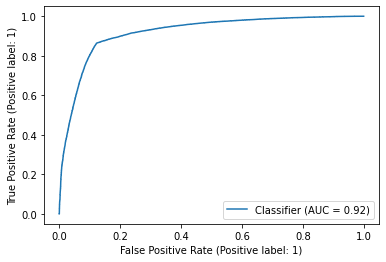

In [151]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(df_overlaps_only_bp['classes'])
y_onehot = label_binarizer.transform(df_overlaps_only_bp['classes'])
RocCurveDisplay.from_predictions(y_onehot, df_overlaps_only_bp['eve_scores'], drop_intermediate=True)

In [152]:
# set the desired FPR threshold
desired_fpr = 0.05
idx = (np.abs(fpr - desired_fpr)).argmin()
threshold = thresholds[idx]
threshold

0.7600803103730015

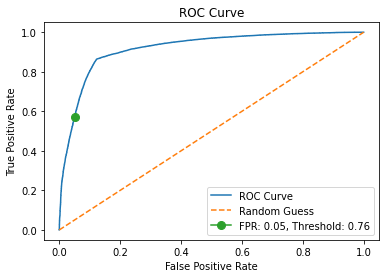

In [153]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.plot(fpr[idx], tpr[idx], marker='o', markersize=8, label=f'FPR: {desired_fpr:.2f}, Threshold: {threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [122]:
df_ACADM_check = df_clinvar_eve_overlaps.dropna()
df_ACADM_check

,Name,GeneSymbol,ClinicalSignificance,CDS_position,AlleleChange,Protein_Patterns,Amino_acids_before_3letters,Protein_positions,Amino_acids_after_3letters,UniProtKB-AC,UniProtKB-ID,stars,classes,Amino_acids_before,Amino_acids_after,eve_scores,eve_labels
0,NM_000016.6(ACADM):c.1010A>C (p.Tyr337Ser),ACADM,Likely pathogenic,1010,A/C,Tyr337Ser,Tyr,337,Ser,A0A0S2Z366,ACADM_HUMAN,2,Pathogenic,Y,S,0.200554,Benign
1,NM_000016.6(ACADM):c.1034A>T (p.Asp345Val),ACADM,Pathogenic,1034,A/T,Asp345Val,Asp,345,Val,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,D,V,0.633991,Uncertain
2,NM_000016.6(ACADM):c.1042C>T (p.Arg348Cys),ACADM,Pathogenic,1042,C/T,Arg348Cys,Arg,348,Cys,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,R,C,0.639925,Uncertain
3,NM_000016.6(ACADM):c.1045C>G (p.Arg349Gly),ACADM,Pathogenic,1045,C/G,Arg349Gly,Arg,349,Gly,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,R,G,0.512999,Uncertain
4,NM_000016.6(ACADM):c.1046G>A (p.Arg349Gln),ACADM,Pathogenic,1046,G/A,Arg349Gln,Arg,349,Gln,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,R,Q,0.301018,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,NM_000016.6(ACADM):c.949C>G (p.Gln317Glu),ACADM,Likely pathogenic,949,C/G,Gln317Glu,Gln,317,Glu,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,Q,E,0.480822,Uncertain
72,NM_000016.6(ACADM):c.950A>T (p.Gln317Leu),ACADM,Likely pathogenic,950,A/T,Gln317Leu,Gln,317,Leu,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,Q,L,0.813875,Pathogenic
73,NM_000016.6(ACADM):c.977T>C (p.Met326Thr),ACADM,Pathogenic/Likely pathogenic,977,T/C,Met326Thr,Met,326,Thr,A0A0S2Z366,ACADM_HUMAN,2,Pathogenic,M,T,0.709411,Pathogenic
74,NM_000016.6(ACADM):c.982A>G (p.Met328Val),ACADM,Pathogenic,982,A/G,Met328Val,Met,328,Val,A0A0S2Z366,ACADM_HUMAN,1,Pathogenic,M,V,0.169193,Benign


In [123]:
# calculate AUC
auc_roc = roc_auc_score(df_ACADM_check['classes'], df_ACADM_check['eve_scores'])

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [55]:
from sklearn.metrics import roc_auc_score
# true labels are assumed to be binary (which is true in this case)
auc_roc = roc_auc_score(df_ACADM_check['classes'], df_ACADM_check['eve_scores'])
print('AUC-ROC: ',  auc_roc)

AUC-ROC:  0.9583333333333334


In [146]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(df_ACADM_check['classes'], df_ACADM_check['eve_scores'], pos_label='Pathogenic')
print( fpr, tpr, thresholds)

[nan nan nan] [0.         0.01388889 1.        ] [1.8876015604850305 0.8876015604850305 0.0973653245614212]


/opt/rh/rh-python38/root/usr/local/lib64/python3.8/site-packages/sklearn/metrics/_ranking.py:1007: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


In [109]:
auc(fpr,tpr)

0.9583333333333334

/opt/rh/rh-python38/root/usr/local/lib64/python3.8/site-packages/sklearn/metrics/_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


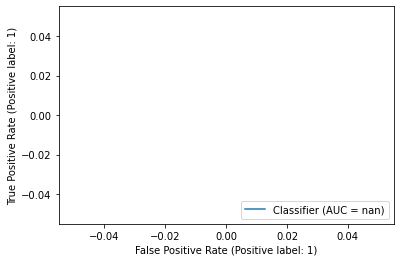

In [145]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(df_ACADM_check['classes'])
y_onehot_test = label_binarizer.transform(df_ACADM_check['classes'])
RocCurveDisplay.from_predictions(y_onehot_test, df_ACADM_check['eve_scores'], pos_label=1, drop_intermediate=False)

In [ ]:
label_binarizer.classes_

In [62]:
# set the desired FPR threshold
desired_fpr = 0.05

# (one-hot labels, probs/scores)
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

# find the threshold that corresponds to the desired FPR
idx = (np.abs(fpr - desired_fpr)).argmin()
threshold = thresholds[idx]

# plot the ROC curve with the specified threshold
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
#plt.plot(fpr, tpr[idx], marker='o', markersize=8, label=f'FPR: {desired_fpr:.2f}, Threshold: {threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

/opt/rh/rh-python38/root/usr/local/lib64/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


TypeError: plot_roc_curve() missing 1 required positional argument: 'estimator'

In [104]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(df_ACADM_check['classes'])
y_onehot_test = label_binarizer.transform(df_ACADM_check['classes'])
y_onehot_test

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [105]:
y_pred = label_binarizer.transform(df_ACADM_check['eve_labels'])
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [106]:
label_binarizer.classes_

array(['Benign', 'Pathogenic'], dtype='<U10')

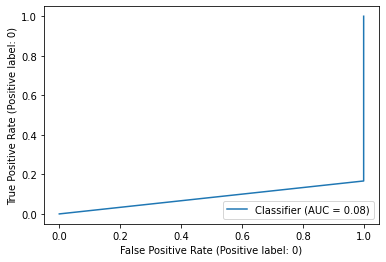

In [77]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_onehot_test,y_pred, pos_label=0)

In [83]:
auc_roc = roc_auc_score(y_onehot_test, y_pred)
auc_roc

0.9166666666666667

In [85]:
fpr, tpr, thresholds = roc_curve(y_onehot_test, y_pred, pos_label=0)
print( fpr, tpr, thresholds)

[0. 1. 1.] [0.         0.16666667 1.        ] [2 1 0]


In [86]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(random_state=42, solver='lbfgs')
clf.fit(X, y)

# set the threshold for the positive class to 0.6
threshold = 0.6

# get the predicted probabilities for each class
probas = clf.predict_proba(X)

# convert the predicted probabilities to binary predictions
y_pred = (probas[:, 1] >= threshold).astype(int)

# calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
print('True Positives:', tp)
print('False Positives:', fp)
print('True Negatives:', tn)
print('False Negatives:', fn)

True Positives: 380
False Positives: 74
True Negatives: 423
False Negatives: 123


In [89]:
probas[:,1]

array([7.58677418e-01, 1.52947665e-03, 2.69495451e-01, 8.18695619e-01,
       8.97174540e-02, 5.63066526e-01, 9.73621908e-01, 5.37516208e-01,
       9.92304480e-01, 7.41103071e-03, 1.32330457e-01, 1.45627352e-02,
       8.16332351e-01, 4.50630347e-01, 9.35719419e-01, 8.17734552e-01,
       7.88761590e-01, 7.22117688e-02, 3.93733822e-01, 1.45409748e-02,
       9.71299985e-02, 9.76623138e-01, 5.78734767e-01, 4.85021592e-01,
       1.29537650e-01, 1.78943263e-03, 4.19408164e-02, 9.83116495e-02,
       2.02249838e-01, 8.94453857e-01, 1.30757675e-01, 3.86824826e-01,
       9.30241393e-01, 2.86878558e-01, 2.59791118e-01, 5.88568272e-01,
       5.99166670e-01, 6.33430999e-02, 7.93628211e-01, 9.24499715e-03,
       1.80616318e-01, 7.76125447e-02, 6.50668734e-01, 9.35657139e-01,
       2.97405884e-01, 4.48765418e-02, 7.64348789e-01, 1.01199225e-01,
       8.32641142e-01, 5.08992802e-01, 1.53374719e-01, 4.97537481e-01,
       6.05218826e-02, 7.13899457e-01, 5.42772730e-03, 9.59860902e-01,
      

In [90]:
probas

array([[0.24132258, 0.75867742],
       [0.99847052, 0.00152948],
       [0.73050455, 0.26949545],
       ...,
       [0.19419313, 0.80580687],
       [0.57225786, 0.42774214],
       [0.72244278, 0.27755722]])

In [91]:
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

In [92]:
idx = (np.abs(thresholds - threshold)).argmin()

In [93]:
idx

118

In [94]:
thresholds

array([1.99886499e+00, 9.98864995e-01, 9.93859449e-01, 9.92304480e-01,
       9.86677838e-01, 9.86639701e-01, 9.85819902e-01, 9.85572286e-01,
       9.84191974e-01, 9.82797859e-01, 9.80349167e-01, 9.80061431e-01,
       9.78854969e-01, 9.78478680e-01, 9.75373475e-01, 9.75209352e-01,
       9.73746760e-01, 9.73621908e-01, 9.46908897e-01, 9.45848351e-01,
       9.35777425e-01, 9.35719419e-01, 9.33814495e-01, 9.31785174e-01,
       9.28826431e-01, 9.28286405e-01, 9.25037494e-01, 9.24454945e-01,
       9.21761392e-01, 9.21283365e-01, 9.12713576e-01, 9.12269754e-01,
       9.01745353e-01, 8.97499701e-01, 8.95169520e-01, 8.95146008e-01,
       8.82785112e-01, 8.82458481e-01, 8.81671264e-01, 8.79758511e-01,
       8.76924327e-01, 8.75359805e-01, 8.63768793e-01, 8.63617230e-01,
       8.60760046e-01, 8.60155329e-01, 8.59188303e-01, 8.57331273e-01,
       8.56233891e-01, 8.54271368e-01, 8.48084660e-01, 8.45827859e-01,
       8.44524041e-01, 8.43707561e-01, 8.39266557e-01, 8.38343127e-01,
      

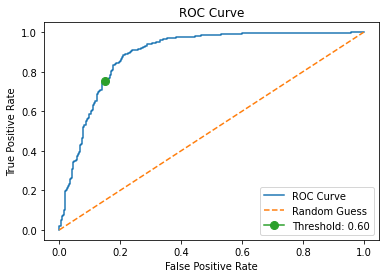

In [95]:
# plot the ROC curve with the specified threshold
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.plot(fpr[idx], tpr[idx], marker='o', markersize=8, label=f'Threshold: {threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

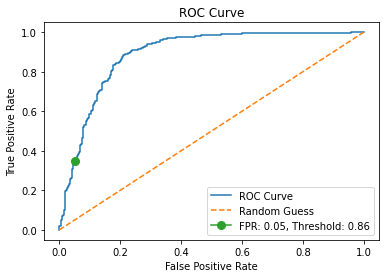

In [96]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(random_state=42, solver='lbfgs')
clf.fit(X, y)

# set the desired FPR threshold
desired_fpr = 0.05

# get the predicted probabilities for each class
probas = clf.predict_proba(X)

# calculate the FPR, TPR, and thresholds for different threshold values
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

# find the threshold that corresponds to the desired FPR
idx = (np.abs(fpr - desired_fpr)).argmin()
threshold = thresholds[idx]

# plot the ROC curve with the specified threshold
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.plot(fpr[idx], tpr[idx], marker='o', markersize=8, label=f'FPR: {desired_fpr:.2f}, Threshold: {threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

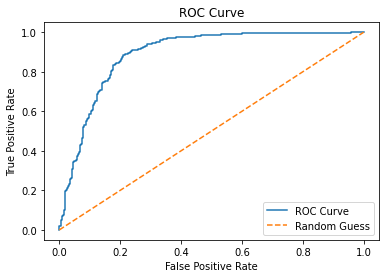

In [97]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(random_state=42, solver='lbfgs')
clf.fit(X, y)

# set the desired FPR threshold
desired_fpr = 0.05

# get the predicted probabilities for each class
probas = clf.predict_proba(X)

# calculate the FPR, TPR, and thresholds for different threshold values
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

# find the threshold that corresponds to the desired FPR
idx = (np.abs(fpr - desired_fpr)).argmin()
threshold = thresholds[idx]

# plot the ROC curve with the specified threshold
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
#plt.plot(fpr, tpr[idx], marker='o', markersize=8, label=f'FPR: {desired_fpr:.2f}, Threshold: {threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [98]:
fpr[idx]

0.05030181086519115

In [99]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8894920217127816

In [100]:
y

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,